In [1]:
import utils

import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn import model_selection 

# plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
study_name = "AGP_2018_biomotu_k7_feces_healthy"#"AGP_2018_biomotu_k7_feces_healthy" #

data_folder = "/Users/leahbriscoe/Documents/MicroBatch/MicrobiomeDenoisingData/" + str(study_name)#"WR_AD")#

plot_folder = "/Users/leahbriscoe/Documents/MicroBatch/MicrobiomeDenoising_Plots/" + str(study_name)# str("WR_AD")
#os.mkdir(plot_folder)


In [3]:
def load_pcscores(data_folder,method,data_type):

    pcscores = pd.read_csv(str(data_folder +"/" + "pcascore_" + data_type + "_" + method +".csv"),index_col=0)
    return pcscores

In [4]:
pcscores_kmer = load_pcscores(data_folder,method = "clr",data_type="kmer")
#pcscores_otu = utils.load_pcscores(data_folder,method="clr",data_type="otu")
pcscores_otu = load_pcscores(data_folder,method="clr",data_type="otu")
metadata = pd.read_csv(data_folder + "/metadata.txt",delimiter="\t")

In [5]:
column_of_interest = 'batch_project_name'
pc_selection ="chunks"##"allbefore"#"oneatatime"# 
data_type = "otu" #"kmer"

In [6]:
if data_type == "otu":
    X_orig = np.array(pcscores_otu)
    y_orig = np.array(metadata.loc[pcscores_otu.index][column_of_interest])
else:
    
    X_orig = np.array(pcscores_kmer)
    y_orig = np.array(metadata.loc[pcscores_kmer.index][column_of_interest])


In [7]:
Counter(y_orig)

Counter({'AG1': 129,
         'AG2': 105,
         'AG3': 31,
         'AG4': 94,
         'AG5': 107,
         'AG6': 55,
         'AG8': 126,
         'AG9': 26,
         'AG10': 121,
         'AG11': 39,
         'AG13': 52,
         'AG14': 51,
         'AG7': 125,
         'AG17': 178,
         'AG18': 169,
         'AG19': 115,
         'AG20': 153,
         'AG22': 338})

In [8]:
total_pcs = 2

In [9]:
#SVC(probility = True)
#clf.predict_proba(X_test)

In [10]:
#last_pc_list

In [11]:
tpr_batches_mean = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(total_pcs+1))))
tpr_batches_std = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(total_pcs+1))))
fpr_batches_mean = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(total_pcs+1))))
fpr_batches_std = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(total_pcs+1))))


last_pc_list = list(range(1,(total_pcs+1))) 

if pc_selection == "allbefore":
    first_pc_list = np.repeat(0, total_pcs, axis=0)
elif pc_selection == "oneatatime":
    first_pc_list = np.array(last_pc_list) - 1
elif pc_selection == "chunks":
    first_pc_list = [1,6]
    last_pc_list = [5,10]


   

for set_num in range(len(last_pc_list)):
    print(set_num)
    first_pc = first_pc_list[set_num]
    last_pc = last_pc_list[set_num]
    X = np.array(X_orig)[:,first_pc:last_pc]
    y = y_orig

    n_repeats = 1
    n_splits = 5
    rskf = model_selection.RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=123)

    tpr_batches = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(n_splits+1))))
    fpr_batches = pd.DataFrame(index = list(range(1,23)), columns= list(range(1,(n_splits+1))))
    it = 0
    for train_index, test_index in rskf.split(X, y):
        it+=1
        #print(cv_it)
        X_train, X_test = X[train_index,], X[test_index,]
        y_train, y_test = y[train_index], y[test_index]

        clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
        preds = clf.predict(X_test)

        for batch_num in range(1,23):
            one_class_truth = np.array(y_test == ('AG' + str(batch_num)))
            one_class_pred = np.array(preds == ('AG' + str(batch_num)))
            fp = one_class_pred & (one_class_truth==False)
            tpr = sum(one_class_truth & one_class_pred)/sum(one_class_pred)
            fpr = sum(fp)/sum(one_class_truth == False)
            tpr_batches.loc[batch_num][it] = tpr
            fpr_batches.loc[batch_num][it] = fpr

            #print("tpr " + str(tpr) + ", fpr" + str(fpr) )

    tpr_batches_mean[set_num+1] = tpr_batches.mean(axis =1)
    tpr_batches_std[set_num+1] = tpr_batches.std(axis =1)

    fpr_batches_mean[set_num+1] = fpr_batches.mean(axis =1)
    fpr_batches_std[set_num+1] = fpr_batches.std(axis =1)


0


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


1


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


In [12]:

def plot_intervals(first_batch,last_batch,input_mean, input_std,name):
    pd_mean = input_mean.loc[first_batch:last_batch]
    pd_std = input_std.loc[first_batch:last_batch]
    num_instances = last_batch-first_batch + 1



    nplots = 1
    plot_alpha=0.2

    # color palette
    sns.set()
    current_palette = sns.color_palette()
    #sns.palplot(current_palette)
    palette = sns.color_palette("hls", num_instances)
    plot_color = palette.as_hex()

    plot_marker = ['None','None']
    plot_ls = ['-','--']
    plot_lw = 2
    
    text_size = 10
    title = name
    x_label = 'Number of PC'
    y_label = 'Rate'




    fig, ax = plt.subplots(nplots, sharex=True, sharey=True)

    count_off = 0
    for i in range(first_batch,(last_batch+1)): 

        #ax.fill_between(pd_mean.loc[i], pd_mean.loc[i]-pd_std.loc[i], pd_mean.loc[i]+pd_std.loc[i], color=plot_color[i-1], lw=0, alpha=plot_alpha)
        ax.fill_between(list(range(1,total_pcs+1)), pd_mean.loc[i]-pd_std.loc[i], pd_mean.loc[i]+pd_std.loc[i], color=plot_color[count_off], lw=0, alpha=plot_alpha)
        ax.plot(list(range(1,total_pcs+1)), pd_mean.loc[i], color=plot_color[count_off], ls='-', lw=plot_lw, marker=plot_marker[0])
        count_off += 1
    
    xint = range(total_pcs+1)
    plt.xticks(xint)
    
    ax.set_xlabel(x_label, size=text_size)
    ax.tick_params(labelsize=text_size, axis='x')
    ax.set_ylabel(y_label, size=text_size)
    ax.tick_params(labelsize=text_size, axis='y')
    
    ax.set_title(title, size = text_size + 2)

    class LegendObject(object):
        def __init__(self, facecolor='white', edgecolor='white', dashed=False):
            self.facecolor = facecolor
            self.edgecolor = edgecolor
            self.dashed = dashed

        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch = mpatches.Rectangle(
                # create a rectangle that is filled with color
                [x0, y0], width, height, facecolor=self.facecolor,
                # and whose edges are the faded color
                edgecolor=self.edgecolor, lw=3)
            handlebox.add_artist(patch)

            # if we're creating the legend for a dashed line,
            # manually add the dash in to our rectangle
            if self.dashed:
                patch1 = mpatches.Rectangle(
                    [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                    transform=handlebox.get_transform())
                handlebox.add_artist(patch1)

            return patch

    from matplotlib.colors import colorConverter as cc
    import matplotlib.patches as mpatches
    bg = np.array([1, 1, 1])  # background of the legend is white
    colors = plot_color
    # with alpha = .5, the faded color is the average of the background and color
    colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]


    handler = dict()
    for j in list(range(num_instances)):
        handler[j] = LegendObject(colors[j], colors_faded[j])

       
    #list(range(first_batch,(last_batch+1))
    ax.legend(list(range(num_instances)),  ["AG" + str(i) for i in range(first_batch,(last_batch+1))],
               handler_map=handler)
    ax.set_facecolor('white')
    #ax.title('AUC confidence interval plot')
    fig.tight_layout()
    #fig.set_axis_on()
    ax.grid(color = "grey",linewidth=0.2)
    fig.show()
    fig.savefig(str(plot_folder) + '/' + name + str('.pdf'))
    fig.savefig(str(plot_folder) + '/' + name + str('.jpg'))

In [13]:

#last_batch

In [14]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/MicrobiomeDenoising_Plots/AGP_2018_biomotu_k7_feces_healthy'

/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


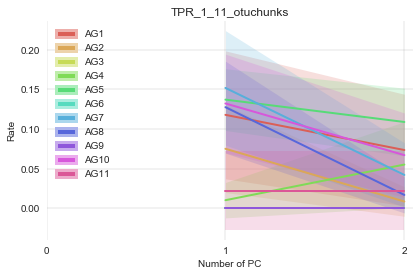

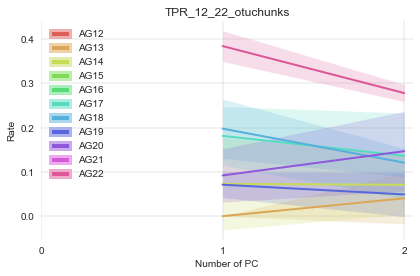

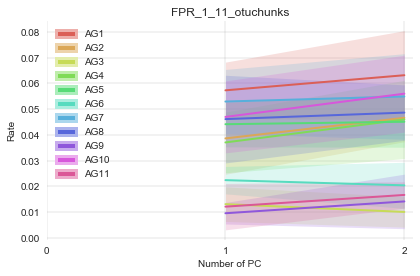

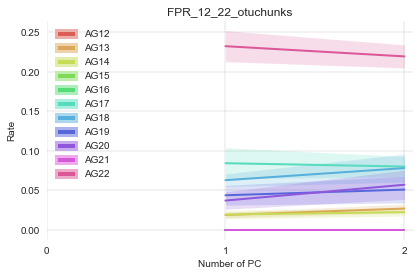

In [15]:
# first_batch = 1
# last_batch = 11
# input_mean = tpr_batches_mean
# input_std = tpr_batches_std
tpr_batches_std = tpr_batches_std.replace([np.inf, -np.inf], np.nan)
tpr_batches_mean = tpr_batches_mean.replace([np.inf, -np.inf], np.nan)

fpr_batches_std = fpr_batches_std.replace([np.inf, -np.inf], np.nan)
fpr_batches_mean = fpr_batches_mean.replace([np.inf, -np.inf], np.nan)

plot_intervals(1,11,tpr_batches_mean,tpr_batches_std,("TPR_1_11_" + data_type + pc_selection))
    
plot_intervals(12,22,tpr_batches_mean,tpr_batches_std,("TPR_12_22_" + data_type + pc_selection))

plot_intervals(1,11,fpr_batches_mean,fpr_batches_std,("FPR_1_11_" + data_type + pc_selection))
    
plot_intervals(12,22,fpr_batches_mean,fpr_batches_std,("FPR_12_22_" + data_type + pc_selection))
    
